<a href="https://colab.research.google.com/github/sdias22/Processamento-Digital-de-Img/blob/main/06_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 07 - Rotulação

Neste notebook, veremos como **rotular** os **componentes** de uma imagem.

Observe que a definição de uma "**componente conexa**" depende de qual definição de **vizinhança** utilizada.

O primeiro passo é importar as bibliotecas necessárias para fazer estas operações.

(Este material é do prof. Zampirolli, com erros do prof. Noma.)

In [87]:
from skimage import io
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Exemplo

Nesta aula, usaremos o exemplo da segmentação da imagem de arroz.

Para isto, usaremos um pequeno recorte da imagem original para testar o nosso algoritmo de rotulação.

Usaremos a limiarização automática pelo algoritmo de Otsu, da biblioteca OpenCV.

O objetivo da rotulação será responder a seguinte pergunta (ou seja, fazer a contagem de maneira automática):

**Pergunta**: Quantos grãos de arroz há na imagem?

Execute o trecho de código a seguir e veja o nosso recorte usado como exemplo.

Text(0.5, 1.0, '2.Limiar 146.0')

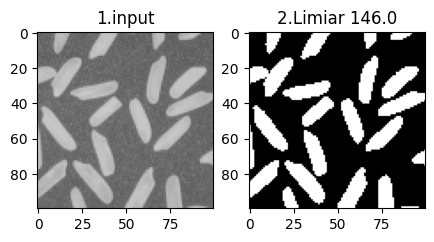

In [88]:
url = "https://drive.google.com/u/3/uc?id=119ZuBkBZsmRk_YejnUxKQ6RNgqReCfBM&export=download"
im = io.imread(url)

#f = im[100:210,100:210, 0]
f = im[30:285,85:340,0]
f = f[5:105,150:250]
T,b = cv2.threshold(f,0,255,cv2.THRESH_OTSU)

fig, axs = plt.subplots(1, 2, figsize=(5, 7))
axs[0].imshow(f,"gray", vmin=0, vmax=255)
axs[0].set_title('1.input')
axs[1].imshow(b,"gray", vmin=0, vmax=255)
axs[1].set_title('2.Limiar '+str(T))


Para o cálculo da rotulação de componente, usaremos a estrutura de **pilha**.

### Pilha

Operações com Pilha $S$:
- empilha ($S$, $x$): insere $x$ no topo da pilha $S$
- desempilha ($S$): remove o elemento $x$ que está no topo da pilha e devolve $x$
- vazio ($S$): devolve *True* se pilha vazia, *False* caso contrário
- topo ($S$): devolve elemento do topo sem remover


In [89]:
# Assume pilha nao vazia
def topo (S):
  return S[len(S)-1]

def vazio (S):
  return len(S) == 0

def empilha (S, x):
  S.append (x)

# Assume pilha nao vazia
def desempilha (S):
  return S.pop()

O trecho abaixo testa a Pilha com um exemplo pequeno.

In [90]:
S = []
print (vazio(S))
empilha (S, 10)
print (vazio(S))
print (S)

True
False
[10]


## Rotulação (*Label*)

Dada uma imagem $A$, o algoritmo rotula os pixels de $A$ de acordo com cada componente da imagem.

Assume que a imagem $A$ é "binária": zero é fundo, outro valor é objeto.

Devolve uma imagem $R$ com os rótulos de cada pixel, e o total de componentes.

Note que o algoritmo é muito semelhante a uma **busca em profundidade** em **Teoria dos Grafos**!

**Pergunta**: Você conseguirir implementar este algoritmo de maneira recursiva, sem usar explicitamente a **pilha**?

```
rotulacao (A)
  para cada pixel i da imagem A:
    R[i] = 0
  cor = 1
  S = []   # pilha vazia
  para cada pixel i da imagem A:
    se A[i] != 0 e R[i] == 0:  # objeto nao pintado
      empilha(S, i)
      enqto not vazia(S):
        j = desempilha(S)
        R[j] = cor
        para cada vizinho k de j:
          se A[j] != 0 e R[i] == 0:  # objeto nao pintado
            empilha(S, k)
      cor = cor + 1
  devolva R e (cor-1)



In [91]:
def rotulacao (A):
  R = np.zeros_like (A)
  cor = 1
  h, w = A.shape
  tamViz = 1    # vizinhanca 3x3
  S = []        # pilha vazia
  for l in range (h):
    for c in range (w):
      if A[l,c] and not R[l,c]:    # objeto nao pintado
        empilha (S, [l,c])
        while not vazio(S):   # enqto a pilha nao estiver vazia, pinta objeto da mesma cor
          i,j = desempilha(S)
          R[i,j] = cor
          for k in range (-tamViz, tamViz+1):
            for l in range (-tamViz, tamViz+1):
              i2 = i + k
              j2 = j + l
              if 0 <= i2 < h and 0 <= j2 < w:
                if A[i2,j2] and not R[i2,j2]:  # objeto nao pintado
                  empilha (S, [i2,j2])
        cor += 1
  return R, cor-1


No trecho abaixo, aplicamos o algoritmo de rotulação para a imagem binária usada como exemplo: recorte da imagem de arroz binarizada.

In [92]:
# rotula os pixels e recebe o total de componentes
c,total = rotulacao (b)

Vamos ver os resultados obtidos?

Text(0.5, 1.0, '4.Rotulo 6')

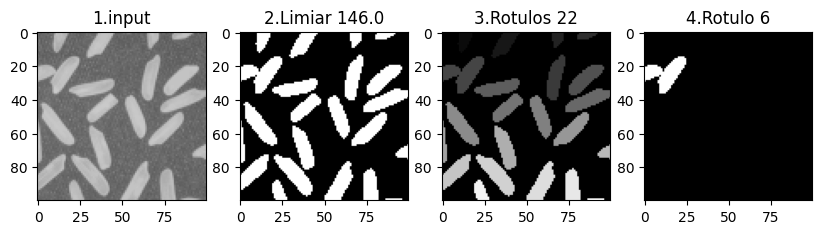

In [93]:
fig, axs = plt.subplots(1, 4, figsize=(10, 5))
axs[0].imshow(f,"gray", vmin=0, vmax=255)
axs[0].set_title('1.input')
axs[1].imshow(b,"gray")
axs[1].set_title('2.Limiar '+str(T))
# mostra todos os componentes rotulados
axs[2].imshow(c,"gray")
axs[2].set_title('3.Rotulos '+str(total))
# mostra um componente particular
axs[3].imshow(c==6,"gray")
axs[3].set_title('4.Rotulo 6')


Note que o componente 6 apareceu com dois grãos de arroz, por que?

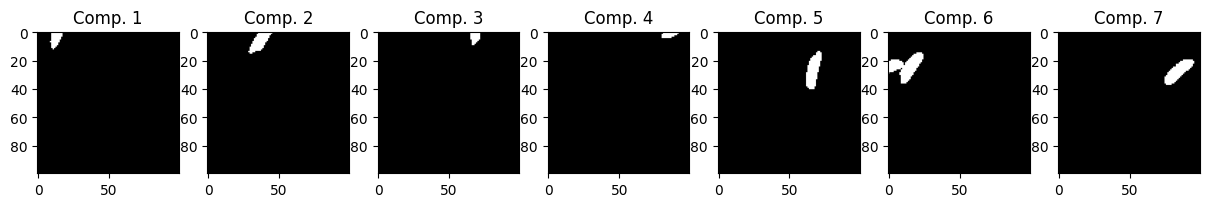

In [94]:
# exibe os primeiros componentes: de 1 a 7
fig, axs = plt.subplots(1, 7, figsize=(15, 5))
for i in range(1,8):
  axs[i-1].imshow(c==i,"gray")
  axs[i-1].set_title('Comp. '+str(i))

Abaixo, exibimos a mesma informação de maneira mais organizada.

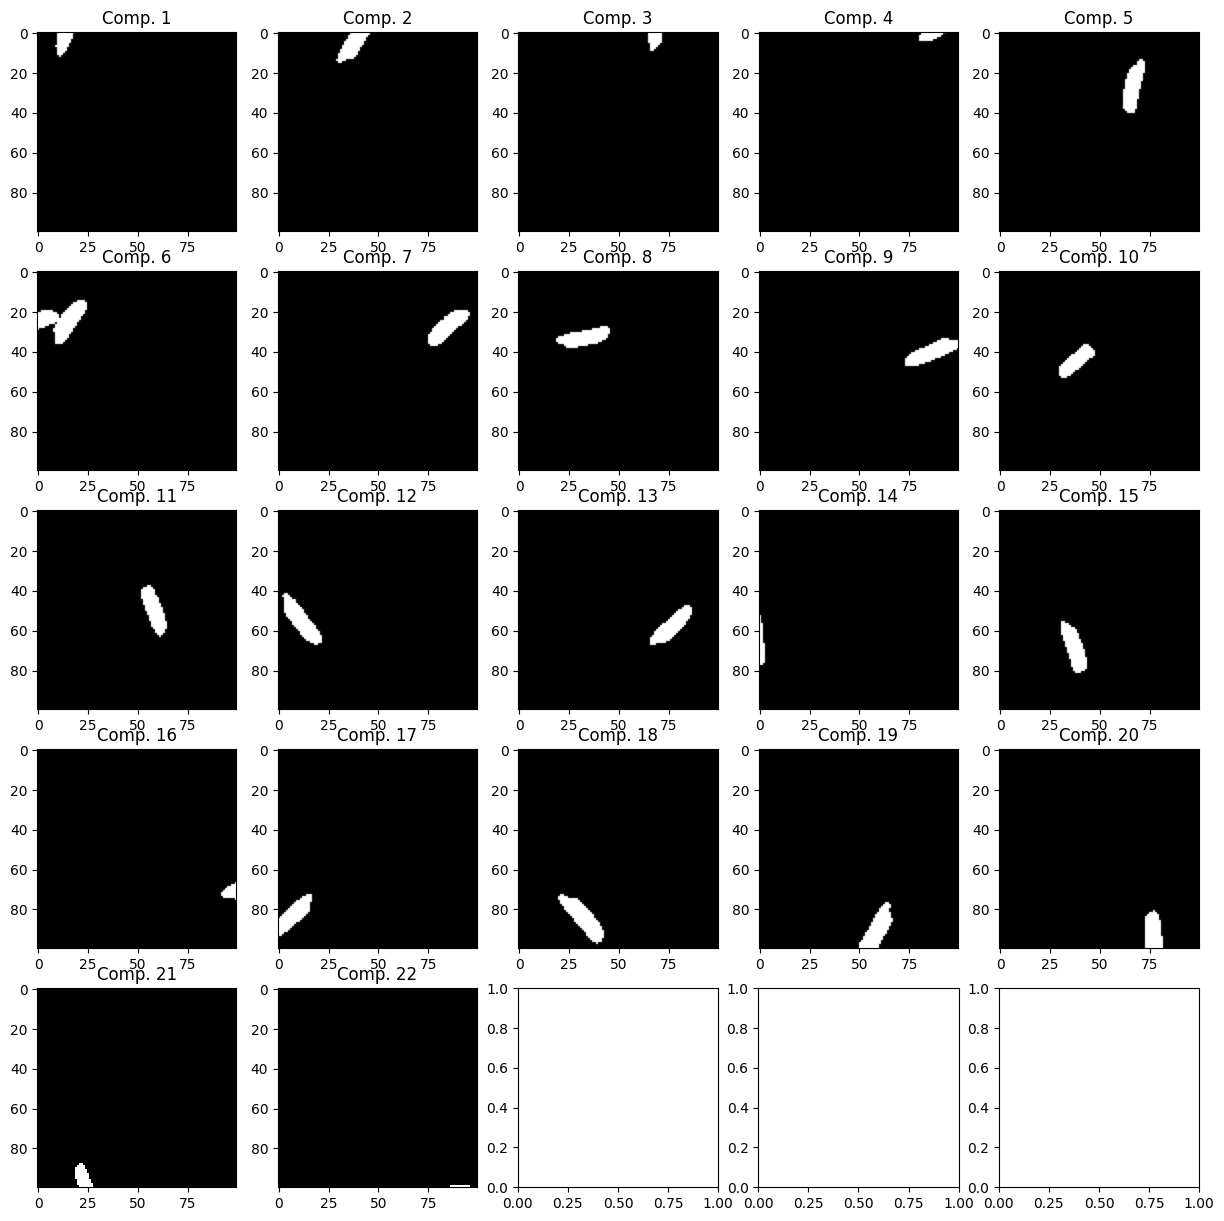

In [95]:
# exibe cada um dos componentes, ate o ultimo
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
  for j in range(5):
    k = i*5 + j+1
    if k <= 22:
      axs[i,j].imshow(c==k,"gray")
      axs[i,j].set_title('Comp. '+str(k))

**Pergunta:** Você lembra o que é **convolução**?

## Convolução

Já vimos exemplos de convolução na aula passada: filtro da média e o filtro da mediana.

Abaixo, implementamos uma função de convolução mais "genérica": ela produzirá um resultado de acordo com a "máscara" especificada na entrada.

**Pergunta:** Como poderíamos usar a função de convolução abaixo para calcular o filtro da média?

In [96]:
# Recebe uma imagem em niveis de cinza (matriz 2D de inteiros)
# e uma mascara (com pesos).
# Devolve uma outra imagem com o resultado da convolucao da imagem com a mascara.
def convolucao (f, m):
  h, w = f.shape
  g = np.zeros_like (f)
  n = len(m)//2
  for i in range(h):
    for j in range(w):
      tot = 0
      soma = 0
      for k in range (-n, n+1):
        for l in range (-n, n+1):
          i2 = i + k
          j2 = j + l
          if i2 >= 0 and i2 < h and j2 >= 0 and j2 < w:
            tot += 1
            soma += f[i2,j2]*m[n+k,n+l]
      #g[i,j] = int(soma)
      g[i,j] = soma
  return g

## Filtro Laplaciano

Na aula passada, vimos filtros **passa baixa** (média e mediana).

Aqui, veremos um filtro **passa alta** para calcular as bordas de uma imagem.

**Pergunta:** Vocês sabem o por que destes nomes? O que quer dizer "passa alta" ou "passa baixa"?

- O Laplaciano de uma função bidimensional é a derivada de segunda ordem definida como:

$$\bigtriangledown^2 f(x,y)=\frac{\partial^2}{\partial x^2}f(x,y) +\frac{\partial^2}{\partial y^2}f(x,y) $$

![picture](https://drive.google.com/uc?export=view&id=1VV1pN-P6FUUQbNwGQWBekI7NrTmTObnf)

In [97]:
# Recebe uma imagem em niveis de cinza (matriz 2D de inteiros).
# Devolve uma outra imagem com o resultado do filtro Laplaciano.
def laplaciano (f):
  m = np.array([[-1, -1, -1],
       [-1, 8, -1],
       [-1, -1, -1]])
  return convolucao (f, m)


Abaixo, testamos o **laplaciano** para a imagem do recorte original em níveis de cinza.

Depois, fazemos o mesmo (calculando as bordas) para a imagem binarizada.

In [98]:
lf=laplaciano(f)
lb=laplaciano(b)


Vamos ver os resultados?

Text(0.5, 1.0, '4.Laplace(b)')

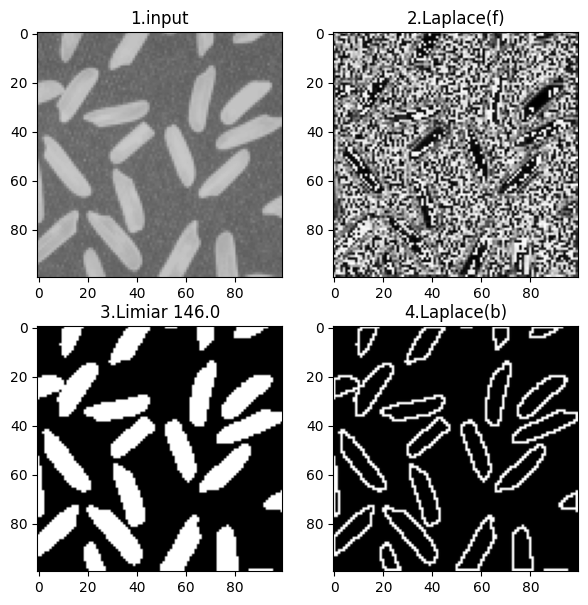

In [99]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0,0].imshow(f,"gray", vmin=0, vmax=255)
axs[0,0].set_title('1.input')
axs[0,1].imshow(lf,"gray")
axs[0,1].set_title('2.Laplace(f)')
axs[1,0].imshow(b,"gray")
axs[1,0].set_title('3.Limiar '+str(T))
axs[1,1].imshow(lb,"gray")
axs[1,1].set_title('4.Laplace(b)')

Por que o primeiro resultado ficou tão "bixado"?

Abaixo, mostramos o recorte original em cinza, a sua binarização, e o original com as bordas sobrepostas.

Text(0.5, 1.0, '3.Segm')

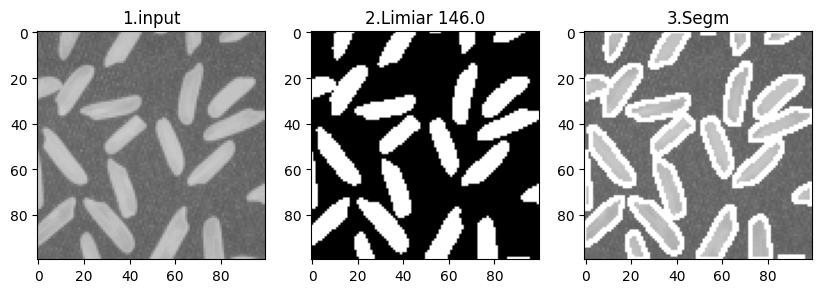

In [100]:
# imagem em niveis de cinza
fl = f.copy()
fl[lb > 0] = 255
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(f,"gray", vmin=0, vmax=255)
axs[0].set_title('1.input')
axs[1].imshow(b,"gray")
axs[1].set_title('2.Limiar '+str(T))
axs[2].imshow(fl,"gray", vmin=0, vmax=255)
axs[2].set_title('3.Segm')


Agora faremos o mesmo, mas destacando ainda mais as bordas com vermelho.

Text(0.5, 1.0, '3.Segm')

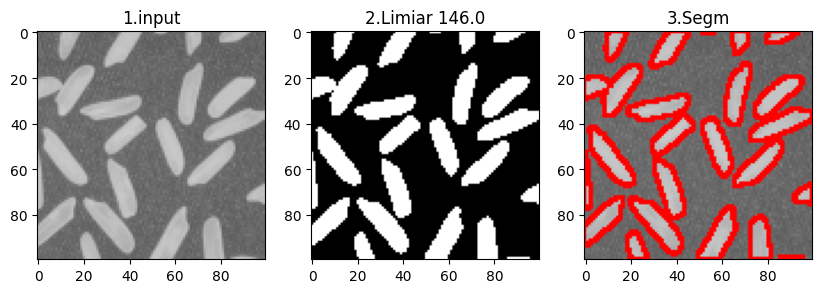

In [101]:
# imagem colorida
fcor = im[30:285,85:340]
fcor = fcor[5:105,150:250]

fl = fcor.copy()
fl[lb > 0] = [255, 0, 0]
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(f,"gray", vmin=0, vmax=255)
axs[0].set_title('1.input')
axs[1].imshow(b,"gray")
axs[1].set_title('2.Limiar '+str(T))
axs[2].imshow(fl)
axs[2].set_title('3.Segm')


Similarmente, destacamos agora as bordas do resultado da rotulação.

Text(0.5, 1.0, '4.Rotulo 6')

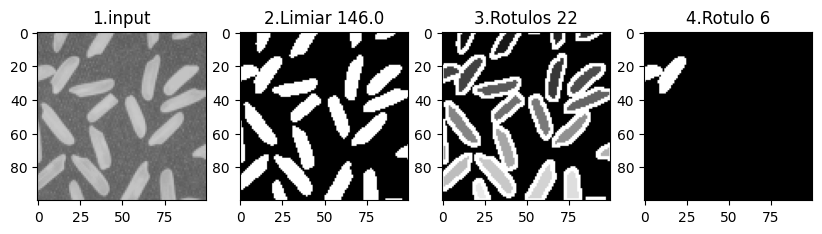

In [102]:
cl = c.copy()
#cl[cl > 0] += 20
#cl[lb > 0] = total+1 + 20
cl[lb > 0] = total+1
fig, axs = plt.subplots(1, 4, figsize=(10, 5))
axs[0].imshow(f,"gray", vmin=0, vmax=255)
axs[0].set_title('1.input')
axs[1].imshow(b,"gray")
axs[1].set_title('2.Limiar '+str(T))
# mostra todos os componentes rotulados
axs[2].imshow(cl,"gray")
axs[2].set_title('3.Rotulos '+str(total))
# mostra um componente particular
axs[3].imshow(c==6,"gray")
axs[3].set_title('4.Rotulo 6')


## Filtro da Média

Este filtro já foi visto na aula passada.

Aqui, ele é reimplementado usando a função de convolução.

In [103]:
# Recebe uma imagem em niveis de cinza (matriz 2D de inteiros).
# Devolve uma outra imagem com o resultado do filtro da Media.
def media (f):
  m = np.array([[1/9, 1/9, 1/9],
       [1/9, 1/9, 1/9],
       [1/9, 1/9, 1/9]])
  return convolucao (f, m)


Abaixo, temos uma sequência de "borramentos" pelo filtro da média.

In [104]:
# versao 1
f1 = media(f)
f2 = media(f1)
f3 = media(f2)
f4 = media(f3)
f5 = media(f4)


Vamos ver os resultados?

Text(0.5, 1.0, '6.media')

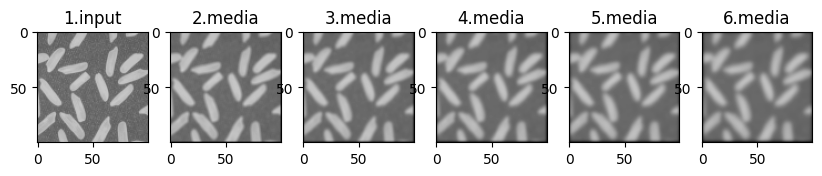

In [105]:
# mostra resultados
fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(f,"gray", vmin=0, vmax=255)
axs[0].set_title('1.input')
axs[1].imshow(f1,"gray", vmin=0, vmax=255)
axs[1].set_title('2.media')
axs[2].imshow(f2,"gray", vmin=0, vmax=255)
axs[2].set_title('3.media')
axs[3].imshow(f3,"gray", vmin=0, vmax=255)
axs[3].set_title('4.media')
axs[4].imshow(f4,"gray", vmin=0, vmax=255)
axs[4].set_title('5.media')
axs[5].imshow(f5,"gray", vmin=0, vmax=255)
axs[5].set_title('6.media')


Agora, faremos o mesmo teste de maneira mais organizada.

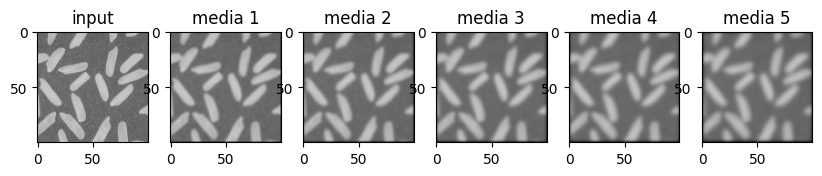

In [106]:
# versao 2
fm = f.copy()
fig, axs = plt.subplots(1, 6, figsize=(10, 5))
axs[0].imshow(f,"gray", vmin=0, vmax=255)
axs[0].set_title('input')
for i in range (1,6):
  fm = media(fm)
  axs[i].imshow(fm,"gray", vmin=0, vmax=255)
  axs[i].set_title('media '+str(i))


# Exemplo: Einstein

Vamos ver se conseguimos "ressaltar" as bordas?

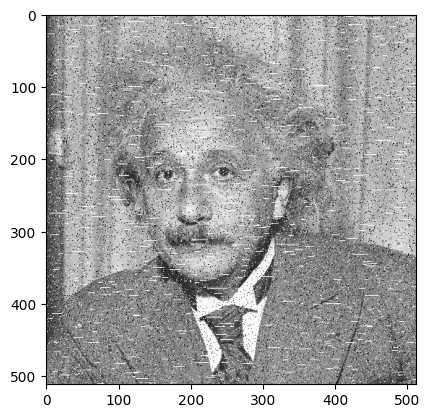

In [107]:
url = "https://drive.google.com/u/3/uc?id=1sMBjAidmKMIqIdFx3zkdFMKPwkbLZh86&export=download"
im = io.imread(url)

plt.imshow(im,"gray")


Na aula passada, vimos o filtro da mediana, lembra?

Vamos repetir o mesmo código abaixo...

In [108]:
# Recebe uma imagem em niveis de cinza (matriz 2D de inteiros).
# Devolve uma outra imagem com o resultado da media.
def filtroMediana (f, n):
  h, w = f.shape
  g = np.zeros_like (f)
  for i in range(h):
    for j in range(w):
      lista = []
      for k in range (-n, n+1):
        for l in range (-n, n+1):
          i2 = i + k
          j2 = j + l
          if i2 >= 0 and i2 < h and j2 >= 0 and j2 < w:
            lista.append (f[i2,j2])
      g[i,j] = np.median(np.array(lista))
  return g

Na aula passada, aplicamos o filtro da **mediana** com máscaras 3x3, 5x5 e 7x7.

Pode demorar um pouquinho para rodar, entao tenha um pouco de paciencia, ok?

Text(0.5, 1.0, 'Mediana 7x7')

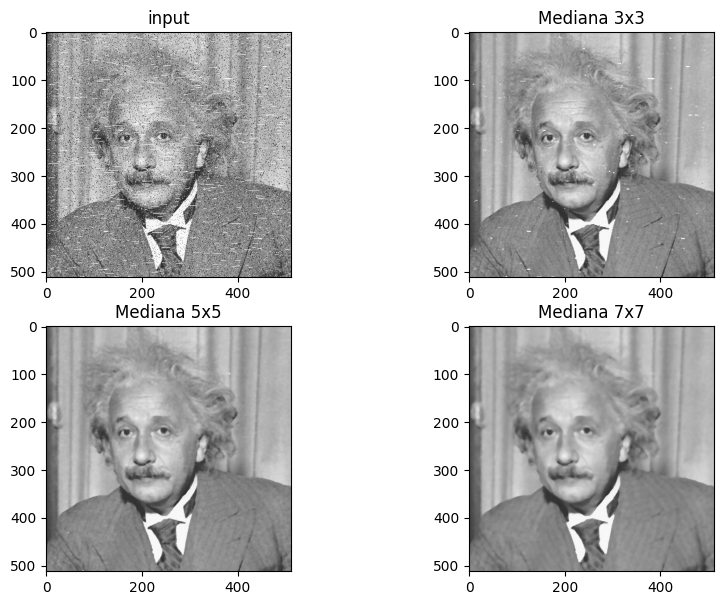

In [109]:
f1 = filtroMediana (im, 1)
f2 = filtroMediana (im, 2)
f3 = filtroMediana (im, 3)
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].imshow(im,"gray", vmin=0, vmax=255)
axs[0, 0].set_title('input')
axs[0, 1].imshow(f1,"gray", vmin=0, vmax=255)
axs[0, 1].set_title('Mediana 3x3')
axs[1, 0].imshow(f2,"gray", vmin=0, vmax=255)
axs[1, 0].set_title('Mediana 5x5')
axs[1, 1].imshow(f3,"gray", vmin=0, vmax=255)
axs[1, 1].set_title('Mediana 7x7')


Vamos examinar as bordas do resultado 5x5?

Desta vez, usaremos uma função do OpenCV (Canny):

https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

0 255
uint8
(512, 512)


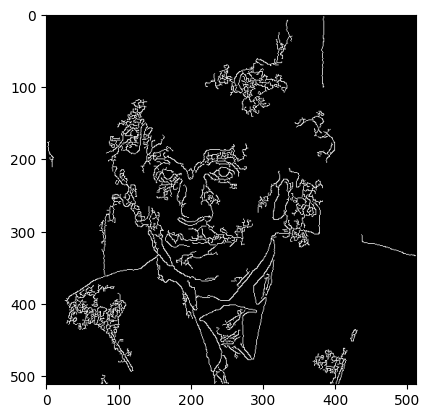

In [110]:
bordas = cv2.Canny(f2, 0, 255)    #bordas
plt.imshow(bordas,'gray')
print (np.min(bordas), np.max(bordas))
print (bordas.dtype)
print (bordas.shape)
bordas[bordas == 255] = 20

Vamos tentar "ressaltar" as bordas?

45 255
int16
(512, 512)


Text(0.5, 1.0, 'ressalta Bordas')

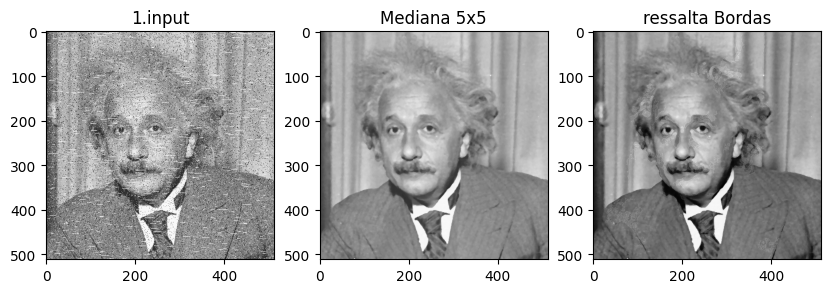

In [111]:
ressaltaBordas = f2.astype('int16') + bordas
ressaltaBordas[ressaltaBordas > 255] = 255
print(np.min(ressaltaBordas), np.max(ressaltaBordas))
print(ressaltaBordas.dtype)
print(ressaltaBordas.shape)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(im,"gray", vmin=0, vmax=255)
axs[0].set_title('1.input')
axs[1].imshow(f2,"gray", vmin=0, vmax=255)
axs[1].set_title('Mediana 5x5')
axs[2].imshow(ressaltaBordas,'gray')
axs[2].set_title('ressalta Bordas')


# Exercício

Faça a rotulação dos componentes para segmentar a imagem das moedas:

https://drive.google.com/u/3/uc?id=1Q-Jx1B84w3zNOParse8klvkCa2aD5x2c&export=download

O que aconteceu no resultado obtido?

Text(0.5, 1.0, '4.Rotulo 8')

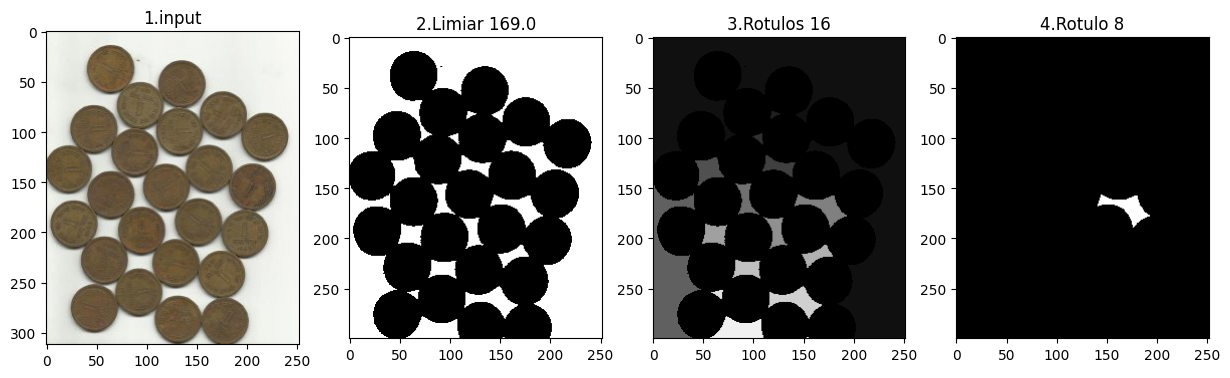

In [114]:
url = "https://drive.google.com/u/3/uc?id=1Q-Jx1B84w3zNOParse8klvkCa2aD5x2c&export=download"
img = io.imread(url)

f = img[0:300,0:400,0]
f = f[0:300,0:400]

T,b = cv2.threshold(f,0,255,cv2.THRESH_OTSU)

# rotula os pixels e recebe o total de componentes
c,total = rotulacao (b)

fig, axs = plt.subplots(1, 4, figsize=(15, 15))
axs[0].imshow(img,"gray", vmin=0, vmax=255)
axs[0].set_title('1.input')
axs[1].imshow(b,"gray")
axs[1].set_title('2.Limiar '+str(T))
# mostra todos os componentes rotulados
axs[2].imshow(c,"gray")
axs[2].set_title('3.Rotulos '+str(total))
# mostra um componente particular
axs[3].imshow(c==8,"gray")
axs[3].set_title('4.Rotulo 8')

Text(0.5, 1.0, '4.Laplace(b)')

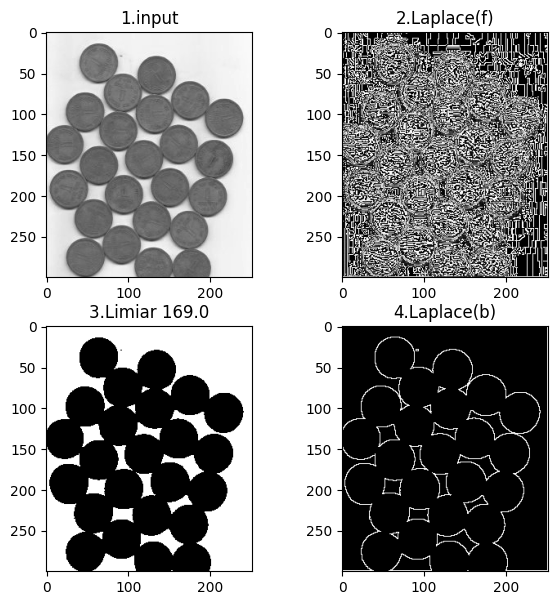

In [115]:
lapF = laplaciano(f)
lapB = laplaciano(b)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0,0].imshow(f,"gray", vmin=0, vmax=255)
axs[0,0].set_title('1.input')
axs[0,1].imshow(lapF,"gray")
axs[0,1].set_title('2.Laplace(f)')
axs[1,0].imshow(b,"gray")
axs[1,0].set_title('3.Limiar '+str(T))
axs[1,1].imshow(lapB,"gray")
axs[1,1].set_title('4.Laplace(b)')

0 255
uint8
(300, 252)


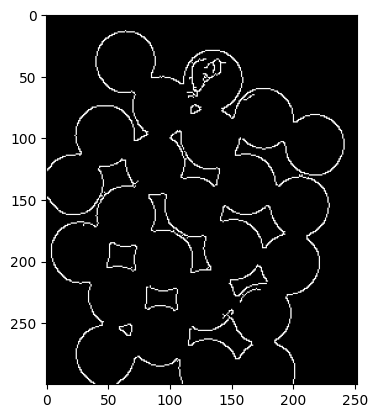

In [116]:
fm2 = filtroMediana (f, 2)

bordas = cv2.Canny(fm2, 0, 255)    #bordas
plt.imshow(bordas,'gray')
print (np.min(bordas), np.max(bordas))
print (bordas.dtype)
print (bordas.shape)
bordas[bordas == 255] = 20

80 255
int16
(300, 252)


Text(0.5, 1.0, 'ressalta Bordas')

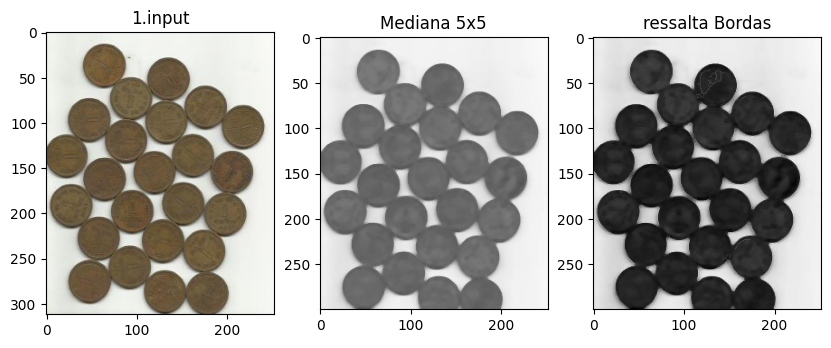

In [124]:
ressaltaBordas = fm2.astype('int16') + bordas
ressaltaBordas[ressaltaBordas > 255] = 255
print(np.min(ressaltaBordas), np.max(ressaltaBordas))
print(ressaltaBordas.dtype)
print(ressaltaBordas.shape)
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img,"gray", vmin=0, vmax=255)
axs[0].set_title('1.input')
axs[1].imshow(fm2,"gray", vmin=0, vmax=255)
axs[1].set_title('Mediana 5x5')
axs[2].imshow(ressaltaBordas,'gray')
axs[2].set_title('ressalta Bordas')